In [1]:
# Initial imports
import os
import requests
import plotly.express as px
import pandas as pd
import pandas_montecarlo
from pathlib import Path
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.animation as ani
from matplotlib import animation


import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Set Params for plot in workbook 

plt.rcParams["figure.figsize"] = (11,6)


In [3]:
# Import Covid Data 
covid_data = Path("covid_cases_by_location.csv")
covid_data = pd.read_csv(covid_data, parse_dates=True, infer_datetime_format=True)

In [4]:
#view pd dataframe 
covid_data.head()

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
0,2020-01-25,2134,X700,Sydney,11300,Burwood (A)
1,2020-01-25,2121,X760,Northern Sydney,16260,Parramatta (C)
2,2020-01-25,2071,X760,Northern Sydney,14500,Ku-ring-gai (A)
3,2020-01-27,2033,X720,South Eastern Sydney,16550,Randwick (C)
4,2020-03-01,2163,X710,South Western Sydney,12850,Fairfield (C)


In [5]:
#Set notification_date as index 

covid_data['notification_date'] = pd.to_datetime(covid_data['notification_date'])

covid_data = covid_data.set_index('notification_date')

#covid_data.drop(['notification_date'], axis =1)
covid_data

,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
notification_date,,,,,
2020-01-25,2134,X700,Sydney,11300,Burwood (A)
2020-01-25,2121,X760,Northern Sydney,16260,Parramatta (C)
2020-01-25,2071,X760,Northern Sydney,14500,Ku-ring-gai (A)
2020-01-27,2033,X720,South Eastern Sydney,16550,Randwick (C)
2020-03-01,2163,X710,South Western Sydney,12850,Fairfield (C)
...,...,...,...,...,...
2021-08-31,2165,X710,South Western Sydney,12850,Fairfield (C)
2021-08-31,2500,X730,Illawarra Shoalhaven,18450,Wollongong (C)
2021-08-31,2142,X740,Western Sydney,12380,Cumberland (A)


In [6]:
#Create Covid count by day
covid_by_day = covid_data['postcode'].groupby(covid_data['postcode'].index.date).count()

covid_by_day

2020-01-25       3
2020-01-27       1
2020-03-01       2
2020-03-02       3
2020-03-03       6
              ... 
2021-08-27    1135
2021-08-28    1135
2021-08-29    1212
2021-08-30    1099
2021-08-31     941
Name: postcode, Length: 526, dtype: int64

[Text(0, 0.5, 'Number of Cases'), Text(0.5, 0, 'Days')]

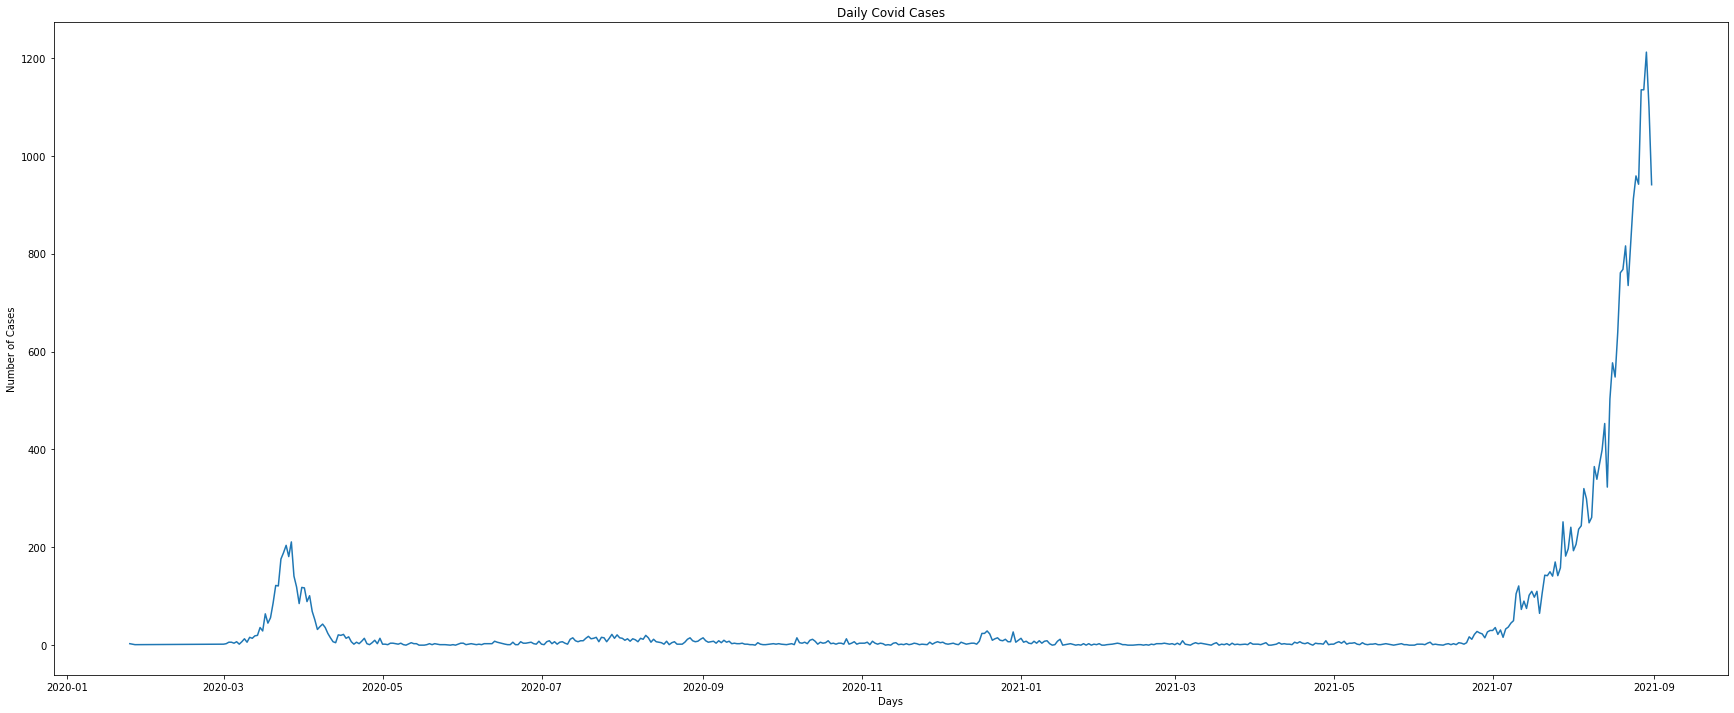

In [7]:
#Graph Covid_by_data data - 14 days 

covid_count_plt = covid_by_day.plot(figsize=(30,12), title='Daily Covid Cases')

covid_count_plt.set(ylabel='Number of Cases', xlabel='Days')

#plt.axhline(y=0.0, color='g', alpha=0.5, linestyle='--')  
#plt.show()

In [8]:
covid_by_day

2020-01-25       3
2020-01-27       1
2020-03-01       2
2020-03-02       3
2020-03-03       6
              ... 
2021-08-27    1135
2021-08-28    1135
2021-08-29    1212
2021-08-30    1099
2021-08-31     941
Name: postcode, Length: 526, dtype: int64

In [9]:
# Determine the Standard Deviation for the last 14 days of Covid Data 
covid_by_day['Change']= covid_by_day.pct_change().fillna(0)
std_14 = covid_by_day['Change'].tail(14).std()
std_14

0.1091329154856369

In [10]:
#This is the mean over the last 14 days of actual data 
mean_14 = covid_by_day['Change'].tail(14).mean()
mean_14

0.04477503539839672

In [11]:
#Set variables for MC Sim for 14 days 

projected_days = 14   #number of days to project out from last day of actual data

num_simulations = 20 #number of simulations required 


daily_changes = np.random.normal(mean_14,std_14,(projected_days,num_simulations))


In [12]:
#Create projection dataframe 
projection = pd.DataFrame((daily_changes + 1).cumprod(axis = 0) * 941)
projection.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1059.918104,1011.226297,915.942206,786.946358,931.447240,944.305320,1040.565384,847.429073,918.350492,783.376965,1019.923656,1125.839211,1056.092494,887.143451,1077.687957,1163.726330,906.037929,909.934257,1060.497164,1187.978937
1,865.947860,877.844054,880.193644,922.343547,1044.838535,1115.923649,901.621214,999.706270,985.996658,707.130365,1256.526228,1185.018068,1080.897320,981.846349,1474.126874,1054.646147,900.066493,965.331940,1212.703161,1212.665440
2,760.416295,1006.135850,1043.759499,743.205097,1214.518937,1141.957273,971.187777,951.195559,1161.969747,733.447345,1514.375614,1144.778099,1227.077053,971.837178,1392.700176,1008.679610,1086.883063,1089.267186,1144.910609,1222.412435
3,858.003642,995.737357,1253.410295,777.942707,1360.424138,1103.330868,1056.546526,918.529928,1276.197187,742.437997,1464.103297,1139.256470,1373.242811,1025.295522,1432.041623,1134.737644,934.069157,1101.308132,1108.996111,1346.248909
4,1011.113331,1073.321507,1444.611341,939.772704,1638.164516,911.622600,1181.011009,1100.400424,1367.631571,824.723193,1396.416814,1194.847116,1561.605819,1040.496408,1232.162733,1367.375531,1022.791817,1070.346602,1141.095466,1473.295653


[Text(0, 0.5, 'Projected Number of Cases'), Text(0.5, 0, 'Projected Days')]

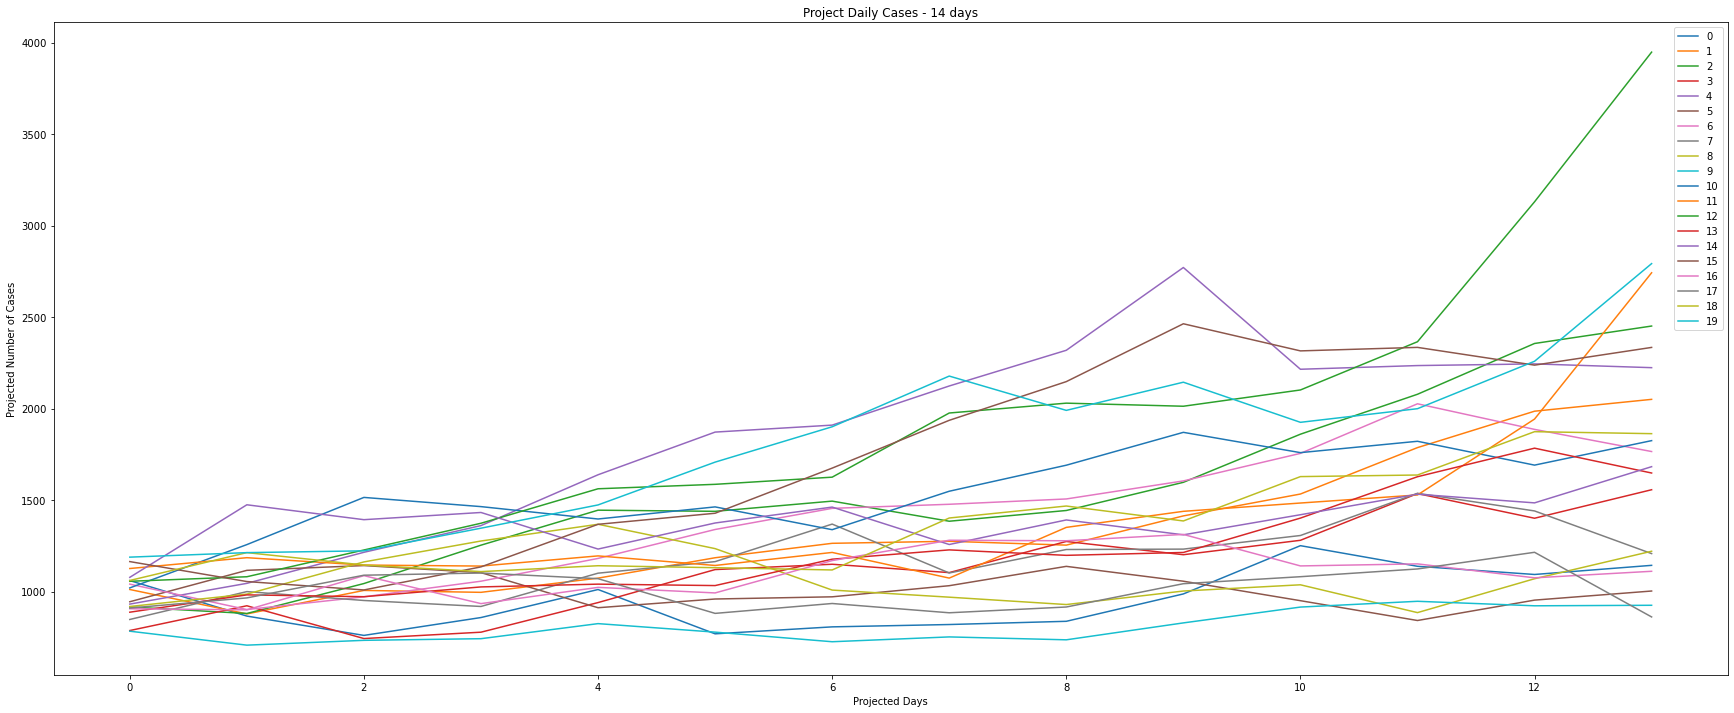

In [13]:
#Plot Projection Scenarios 
projection.plot(figsize=(30,12), title='Project Daily Cases - 14 days').set(ylabel='Projected Number of Cases', xlabel='Projected Days')



In [14]:
#Worst Cast Scenario in 14 days 

projection.max().max()

3947.486582030455

In [15]:
# Based on 30 days 

In [16]:
#Set variables for MC Sim - 30days

projected_days = 30   #number of days to project out from last day of actual data

num_simulations = 20 #number of simulations required 


daily_changes = np.random.normal(mean_14,std_14,(projected_days,num_simulations))


In [17]:
#Create projection dataframe - 30 Days 
projection = pd.DataFrame((daily_changes + 1).cumprod(axis = 0) * 941)
projection.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1103.421995,910.548536,881.802178,1007.422406,1016.100245,925.790013,752.665011,1067.223512,938.771809,1071.991077,890.597825,1045.410587,1036.699492,1125.525329,919.026482,935.528816,986.359793,894.638402,759.561623,1036.610308
1,1378.720804,909.350977,809.087432,1059.333525,977.435953,751.355275,950.554908,1094.225469,935.053657,1033.385614,921.980824,1169.405461,1165.491375,1186.047649,1103.403013,887.568472,854.048349,1022.721245,763.494342,1123.288205
2,1236.624749,992.888149,792.309511,1125.104368,966.065923,900.253880,935.493358,1173.667995,1071.253168,889.340126,941.749130,1148.690392,1348.768114,1682.293742,1153.136441,1051.682373,682.821778,959.792599,846.465322,1021.009589
3,1127.710143,1071.569134,675.446708,1148.138124,1049.572545,1032.668510,949.353654,1284.193079,1124.462970,953.172088,886.075380,1289.654941,1407.528438,1624.928762,1187.893943,1010.829524,658.195385,875.140020,858.742161,991.227305
4,966.065526,1221.947032,751.785497,1266.214210,1120.291959,1064.178238,961.807182,1289.206958,1098.333083,1031.706881,887.982019,1177.853712,1751.189612,1798.182019,1173.864808,1170.012133,648.913837,1061.927288,925.195379,1098.207599


In [18]:
#Worst Cast Scenario in 30 days 

print(projection.max().max())
print(projection.mean().mean())

9070.955731367394
2128.692114336738


[Text(0, 0.5, 'Projected Number of Cases'), Text(0.5, 0, 'Projected Days')]

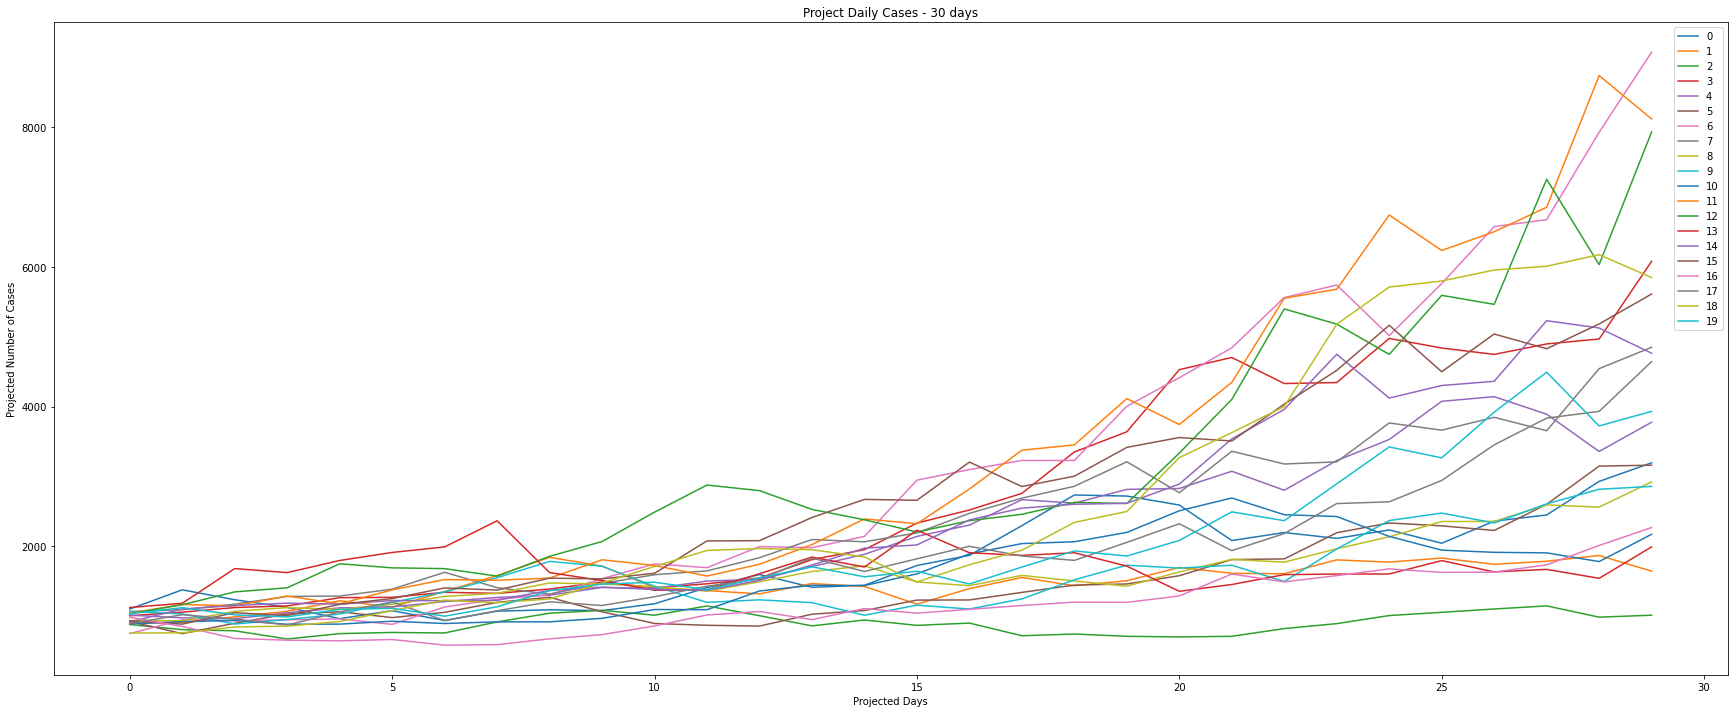

In [19]:
#Graph Covid_by_data data - 30 days

projection.plot(figsize=(30,12), title='Project Daily Cases - 30 days').set(ylabel='Projected Number of Cases', xlabel='Projected Days')

In [20]:
#tried to animate the line graph but this did not work 

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import animation

# dt = 0.01
# tfinal = 1
# x0 = 0

# sqrtdt = np.sqrt(dt)
# n = int(tfinal/dt)
# xtraj = np.zeros(n+1, float)
# trange = np.linspace(start=0,stop=tfinal ,num=n+1)
# xtraj[0] = x0

# for i in range(n):
#     xtraj[i+1] = xtraj[i] + np.random.normal()

# x = trange
# y = xtraj

# # animation line plot example

# fig, ax = plt.subplots(1, 1, figsize = (6, 6))

# def animate(i):
#     ax.cla() # clear the previous image
#     ax.plot(x[:i], y[:i]) # plot the line
#     ax.set_xlim([x0, tfinal]) # fix the x axis
#     ax.set_ylim([1.1*np.min(y), 1.1*np.max(y)]) # fix the y axis

# anim = animation.FuncAnimation(fig, animate, frames = len(x) + 1, interval = 1, blit = False)
# plt.show()